<a href="https://colab.research.google.com/github/husnanzzry/Degree-Project/blob/main/GENETIC_ALGORITHM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

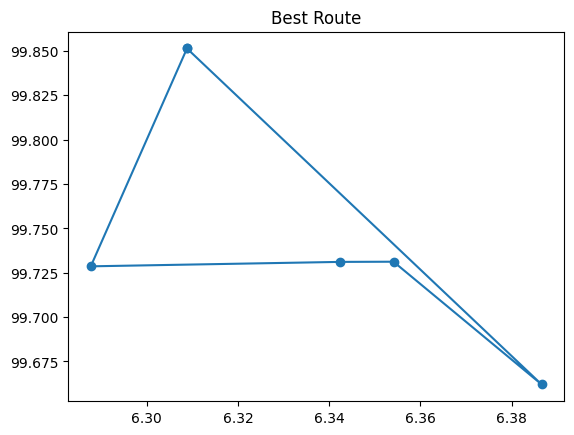

Best Route: ['Dataran Lang', 'Underwater World Langkawi', 'Langkawi Airport', 'Beras Terbakar', 'Langkawi Sky Bridge', 'Dataran Lang']


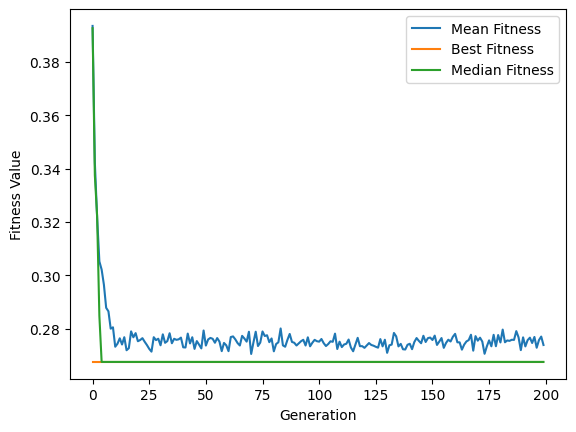

In [ ]:
import random
import matplotlib.pyplot as plt

# Define coordinates for 5 places
places_coordinates = {
    'Langkawi Airport': (6.3424, 99.7311),
    'Dataran Lang': (6.3088, 99.8514),
    'Langkawi Sky Bridge': (6.3866, 99.6620),
    'Beras Terbakar': (6.3541, 99.7312),
    'Underwater World Langkawi': (6.2877, 99.7286),

}

# Define genetic algorithm parameters
population_size = 200
generations = 200
mutation_rate = 0.1

# Function to calculate the total distance of a route
def calculate_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        place1 = route[i]
        place2 = route[i + 1]
        total_distance += ((places_coordinates[place2][0] - places_coordinates[place1][0])**2 +
                           (places_coordinates[place2][1] - places_coordinates[place1][1])**2)**0.5
    return total_distance

# Function to generate an initial population
def generate_initial_population(size):
    population = []
    places = list(places_coordinates.keys())
    for _ in range(size):
        route = random.sample(places, len(places))
        population.append(route)
    return population

# Function to select parents based on tournament selection
def tournament_selection(population, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        participants = random.sample(population, tournament_size)
        winner = min(participants, key=lambda route: calculate_distance(route))
        selected_parents.append(winner)
    return selected_parents

# Function to perform crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + [place for place in parent2 if place not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [place for place in parent1 if place not in parent2[:crossover_point]]
    return child1, child2

# Function to perform mutation
def mutate(route, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(route)), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]
    return route

# Function to plot fitness values over generations
def plot_fitness(generation_fitness):
    plt.plot(generation_fitness['mean'], label='Mean Fitness')
    plt.plot(generation_fitness['best'], label='Best Fitness')
    plt.plot(generation_fitness['median'], label='Median Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness Value')
    plt.legend()
    plt.show()


# Main genetic algorithm loop
population = generate_initial_population(population_size)
generation_fitness = {'mean': [], 'best': [], 'median': []}

for generation in range(generations):
    # Evaluate fitness of each individual in the population
    fitness_values = [calculate_distance(route) for route in population]

    # Record statistics for plotting
    generation_fitness['mean'].append(sum(fitness_values) / population_size)
    generation_fitness['best'].append(min(fitness_values))
    generation_fitness['median'].append(sorted(fitness_values)[population_size // 2])

    # Select parents for crossover
    parents = tournament_selection(population, 5)

    # Create the next generation through crossover and mutation
    next_generation = []
    while len(next_generation) < population_size:
        parent1, parent2 = random.sample(parents, 2)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        next_generation.extend([child1, child2])

    population = next_generation



# Get the best route from the final population
best_route = min(population, key=lambda route: calculate_distance(route))
best_route.append(best_route[0])  # Complete the route by adding the starting point at the end

x, y = zip(*[places_coordinates[place] for place in best_route])
plt.plot(x, y, 'o-')
plt.title('Best Route')
plt.show()

# Print the best route and its total distance
print("Best Route:", best_route)
#print("Total Distance:", calculate_distance(best_route))

# Plot fitness values over generations
plot_fitness(generation_fitness)